<a href="https://colab.research.google.com/github/shekkari1999/PyTorch_learning/blob/main/pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch workflow

# Lets Explore End to End workflow

'''
1. Prepare and Load Data
2. Build Model
3. Fit Model
4. Making Predictions/inference and Evaluation Model
5. Saving and loading Model

'''

'\n1. Prepare and Load Data\n2. Build Model\n3. Fit Model\n4. Making Predictions/inference and Evaluation Model\n5. Saving and loading Model\n\n'

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [6]:
 ## Create a Liner Regression

 ## Y = mX + C

weight = 0.7
bias = 0.3

# Create

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X),len(y)

(50, 50)

In [12]:
# Splitting data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [14]:
# Visualize using matplotlib

def plt_pred(X_train,y_train,X_test,y_test,predictions = None):
  plt.figure(figsize = (10,7))

  # plot training data in blue
  plt.scatter(X_train,y_train, c = "b", s = 4, label = "Training_data")

  # plot testing data
  plt.scatter(X_test,y_test, c = "g", s = 4, label = "Testing_data")

  if predictions is not None:
    plt.scatter(X_test,predictions,c = "r", s = 4, label = "Predictions")

  # show legends
  plt.legend(prop = {"size" : 14})


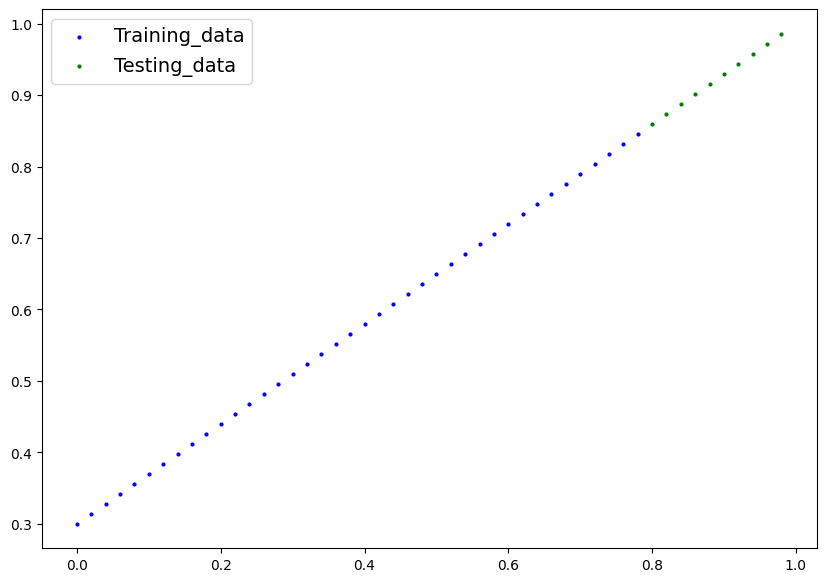

In [21]:
plt_pred(X_train,y_train,X_test,y_test)

In [27]:
## Our first Pytorch model

class LinearRegressionModel(nn.Module):
  # Almost everything in Pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))

    # Forward Method

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [19]:
## Pytorch Model for building essentials

'''
torch.nn contains all graphs related to NN
torch.nn.parameter --> parameters will try and learn
torch.nn.module --> should subclass and over ride forward method
torch.optim --> optimizers will help in gradient decent
def forward() --> should override which performs computation
'''

'\ntorch.nn contains all graphs related to NN\ntorch.nn.parameter --> parameters will try and learn\ntorch.nn.module --> should subclass and over ride forward method\ntorch.optim --> optimizers will help in gradient decent\ndef forward() --> should override which performs computation\n'

In [28]:
# Checking contents of our PyTorch model

# create a random seed
torch.manual_seed(42)

# create an instance of model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
# list named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [30]:
# Make predictions

with torch.inference_mode():
  # why inference mode? Just to make a bit outputs faster
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

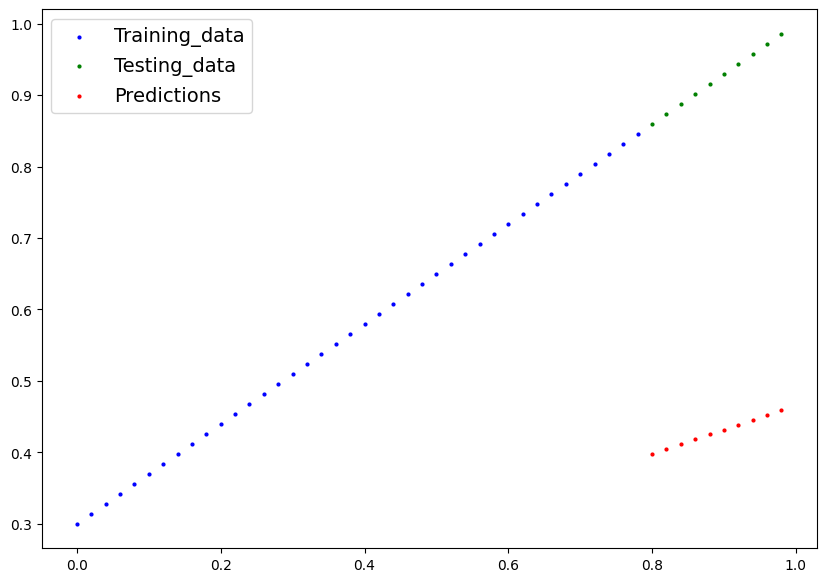

In [31]:
# plot the preds

plt_pred(X_train,y_train,X_test,y_test,y_preds)

In [32]:
# Intuition for Backpropogation

#### Build #####

# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = nn.optim.SGD(params = model_0.parameters(),lr = 0.01)

# Training Loop


# Testing Loop


